# Chapter11 언어를 이해하는 신경망
---

## 언어를 이해한다는 것은 무엇을 의미할까요?

### 사람들은 언어에 대해어떤 예측을 할까요?

지금껏 우리는 이미지 데이터를 예제로 신경망을 학습시켜왔다. 하지만 신경망은 이미지 외에도 폭넓은 종류의 데이터셋을 이해할 수 있다. 이번 장은 딥러닝과 공통점이 많은 어떤 분야를 살펴보며 시작하려고 한다. 이는 딥러닝보다 훨씬 오래된 역사를 갖고있다. 바로 '자연어 처리(NLP)'라고 불리는 분야이다. NLP는 과거에 딥러닝을 사용하지 않았지만 우리는 지금부터 딥러닝을 사용한 NLP의 기초를 알아볼 것이다.

## NLP : 자연어 처리

### NLP는 과업 또는 문제를 기준으로 분류할 수 있습니다.

NLP가 풀고자 하는 많은 문제 중에서 몇 가지를 생각해보면 NLP를 좀 더 빨리 이해할 수 있다. 다음은 NLP에서 흔히 마주하는 몇 가지 유형의 문제들이다.

---
* 문서 내의 문자를 이용해서 단어의 시작과 끝 위치 예측하기  
* 문서 내의 단어를 이용해서 문장의 시작과 끝 위치 예측하기  
* 문서 내의 단어를 이용해서 각 단어의 품사 예측하기  
* 문장 내의 단어를 이용해서 절의 시작과 끝 위치 예측하기  
* 문장 내의 단어를 이용해서 개체명(인물, 장소, 물건) 참조의 시작과 끝 위치 예측하기  
* 문서 내의 문장을 이용해서 어떤 대명사가 동일 인물/장소/물건을 가리키는지 예측하기  
* 문장 내의 단어를 이용해서 문장의 감정 예측하기
---

과업 관점에서 NLP를 크게 세 가지로 분류해보겠다.

---
* 텍스트 영역 분리하기: 품사 태깅(텍스트를 관련된 주제나 카테고리의 형태로 키워드 처리를 해주는 것), 감정 분류, 개체명 인식 등
* 둘 또는 그 이상의 텍스트 영역 연결하기: 예를 들면 실세계 사물이 일반적으로 인물, 장소, 또는 다른 명명된 개체일 때, 실세계 사물에 관한 두 언급이 사실은 동일한 실세계 사물을 가리키고 있는지를 답하는 동일 지시어인 경우
* 맥락에 근거해서 누락된 정보(누락된 단어) 채우기
---

이렇게 보니 NLP와 머신러닝은 참으로 연관 깊어 보인다. 얼마 전까지만 해도 최첨단 NLP 알고리즘은 고급, 확률적, 비모수적 모델이었다. 딥러닝은 아니었다. 하지만 최근에는 대중화된 두 가지 신경망 알고리즘이 NLP 분야를 집어삼켰다. 그 주인공은 신경망 단어 임베딩과 순환 신경망이다.

## 지도 NLP

### 단어가 들어가면 예측이 나옵니다.

지도 학습은 아는 것을 알고 싶은 것으로 변환하는 것이다.  
##### 아는 것 -> 지도 학습 -> 알고 싶은 것

하지만 NLP는 텍스트를 입력으로 받아들이는데, 신경망에 어떻게 텍스트를 입력할까? 그 방법은 입력 숫자를 출력 숫자로 매핑하는 것이다. 첫 번째 단계는 텍스트를 수 형태로 바꾼다. 텍스트 데이터를 신경망이 이해할 수 있는 행렬 형태로 변환해야 한다.

그렇다면 어떻게 텍스트를 숫자로 바꿀 수 있을까? 우리는 신경망은 입력 계층과 출력 계층 사이의 상관관계를 찾는다는 사실을 기억해야 한다. 그러므로 신경망에게 가짱 또렷하게 상관관계가 드러나는 방법으로 텍스트를 숫자로 바꿔야 한다. 이렇게 하면 빠른 학습과 향상된 일반화를 얻을 수 있다.

입력/출력 상관관계를 가장 또렷하게 만드는 입력 형식이 무엇인지 알려면 입력/출력 데이터셋이 어떻게 생겼는지 알아야 한다. 이를 위해 '주제 분류'를 살펴보겠다.

## IMDB 영화 리뷰 데이터셋

### 사람들이 긍정적인 리뷰를 남길지 부정적인 리뷰를 남길지 예측할 수 있습니다.

IMDB 영화 리뷰 데이터셋은 (리뷰, 평점) 쌍의 집합으로 이루어진다.

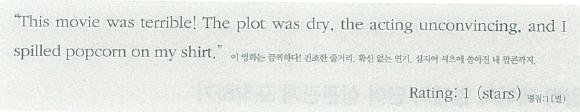

전체 데이터셋은 이와 같은 리뷰와 별 1~5개의 평점 쌍으로 구성된 약 50,000개의 데이터를 갖고 있다. 이는 감정의 지표이기 때문에 감정 데이터셋으로 간주한다.

1 ~5 사이의 점수롤 이루어진 평점을 0 ~1 사이의 범위로 들어오도록 조정해서 이진 softmax를 사용하겠다. 출력에 필요한 것은 이게 전부이다.

출력은 숫자라 문제 없지만 입력은 문자이기 때문에 요령이 필요하다. 또한 가변 길이라는 점이 문제이다. 우리는 이를 해결해야 한다.

단어와 출력 사이의 상관관계를 살펴보면 terrible과 평점 사이, unconvincing과 평점 사이는 상당한 연관이 있다고 생각된다. 이들의 출현 빈도가 높을 수록 평점은 낮아질 것이다.

## 입력 데이터 안에서 단어 상관관계 포착하기

### 단어주머니: 주어진 리뷰어의 어휘에 대해 감정을 예측하세요.

IMDB 리뷰의 어휘와 평점 사이의 상관관계를 관찰한 뒤, 이제 리뷰의 어휘를 표현하는 입력 행렬을 만들어보자.

보통 입력 행렬을 만들 때, 행은 각 영화 리뷰를, 열은 리뷰가 어휘 내의 특정 단어를 포함하는지를 나타내도록 한다. 리뷰에 대한 벡터를 생성하기 위해 리뷰의 어휘를 계산해서 해당 리뷰에 해당하는 각 열에 1을 입력하고 나머지 열에는 0을 입력한다. 벡터의 크기는 어휘 안에 단어가 이천 개 있다고 가정하면 벡터는 한 단어에 요소를 하나씩 할당해야 하니까 각 벡터는 2,000개의 차원을 가져야 한다.

one-hot encoding이라 불리는 이러한 저장 방식은 이진 인코딩 데이터에 사용하는 가장 일반적인 형식이다. 어휘 안에 단어가 4개만 있다면, 원핫 인코딩은 다음과 같은 코드일 것이다.

In [2]:
import numpy as np

onehots = {}
onehots['cat'] = np.array([1,0,0,0])
onehots['the'] = np.array([0,1,0,0])
onehots['dog'] = np.array([0,0,1,0])
onehots['sat'] = np.array([0,0,0,1])

sentence = ['the','cat','sat']
x = onehots[sentence[0]] + \
    onehots[sentence[1]] + \
    onehots[sentence[2]]

print("Sent Encoding:" + str(x))

Sent Encoding:[1 1 0 1]


한 단어가 여러 번 등장하는 경우, 예를 들어 "cat cat cat" 같은 경우에 "cat"을 위한 벡터를 세 번 더해 [3, 0, 0, 0]을 출력하거나 고유의 "cat"을 한 번만 취해 [1, 0, 0, 0]을 출력할 수도 있다. 보통은 후자가 더 나은 성능을 보인다.

## 영화 리뷰 예측하기

### 예전 신경망에 새 인코딩 전략을 추가하면 감정을 예측할 수 있습니다.

방금 우리가 고안한 전략으로, 감정 데이터셋의 각 단어에 대한 벡터를 구축해서 감정 예측을 해보자.

In [3]:
import sys

f = open(r'D:\workplace\study\reviews.txt')
raw_reviews = f.readlines()
f.close()

f = open(r'D:\workplace\study\labels.txt')
raw_labels = f.readlines()
f.close()

tokens = list(map(lambda x:set(x.split(" ")),raw_reviews))

vocab = set()
for sent in tokens:
    for word in sent:
        if(len(word)>0):
            vocab.add(word)
vocab = list(vocab)

word2index = {}
for i,word in enumerate(vocab):
    word2index[word]=i

input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
        except:
            ""
    input_dataset.append(list(set(sent_indices)))

target_dataset = list()
for label in raw_labels:
    if label == 'positive\n':
        target_dataset.append(1)
    else:
        target_dataset.append(0)

In [4]:
tokens[0]

{'',
 '\n',
 '.',
 'a',
 'about',
 'adults',
 'age',
 'all',
 'and',
 'as',
 'at',
 'believe',
 'bromwell',
 'burn',
 'can',
 'cartoon',
 'classic',
 'closer',
 'comedy',
 'down',
 'episode',
 'expect',
 'far',
 'fetched',
 'financially',
 'here',
 'high',
 'i',
 'immediately',
 'in',
 'insightful',
 'inspector',
 'is',
 'isn',
 'it',
 'knew',
 'lead',
 'life',
 'line',
 'm',
 'many',
 'me',
 'much',
 'my',
 'of',
 'one',
 'other',
 'pathetic',
 'pettiness',
 'pity',
 'pomp',
 'profession',
 'programs',
 'ran',
 'reality',
 'recalled',
 'remind',
 'repeatedly',
 'right',
 's',
 'sack',
 'same',
 'satire',
 'saw',
 'school',
 'schools',
 'scramble',
 'see',
 'situation',
 'some',
 'student',
 'students',
 'such',
 'survive',
 't',
 'teachers',
 'teaching',
 'than',
 'that',
 'the',
 'their',
 'think',
 'through',
 'time',
 'to',
 'tried',
 'welcome',
 'what',
 'when',
 'which',
 'who',
 'whole',
 'years',
 'your'}

In [5]:
vocab[:5]

['gilded', 'kingsford', 'pummel', 'recklessness', 'zaat']

In [6]:
word2index

{'gilded': 0,
 'kingsford': 1,
 'pummel': 2,
 'recklessness': 3,
 'zaat': 4,
 'chintzy': 5,
 'sensurround': 6,
 'adair': 7,
 'darcey': 8,
 'fradulent': 9,
 'aol': 10,
 'brimmer': 11,
 'contacting': 12,
 'constricting': 13,
 'intertitles': 14,
 'installations': 15,
 'lili': 16,
 'kharbanda': 17,
 'equipment': 18,
 'threefold': 19,
 'upped': 20,
 'ordered': 21,
 'shue': 22,
 'petiot': 23,
 'stocked': 24,
 'languorously': 25,
 'tamely': 26,
 'intros': 27,
 'lazarus': 28,
 'flatmate': 29,
 'everywere': 30,
 'telefoni': 31,
 'mandelbaum': 32,
 'compendium': 33,
 'dinosaurs': 34,
 'duster': 35,
 'lemmya': 36,
 'yasuzo': 37,
 'slobs': 38,
 'lebeouf': 39,
 'enforcer': 40,
 'garam': 41,
 'genitals': 42,
 'kissy': 43,
 'unforced': 44,
 'hastily': 45,
 'zionist': 46,
 'gryll': 47,
 'dallasian': 48,
 'spicing': 49,
 'moorehead': 50,
 'ghoulie': 51,
 'exhume': 52,
 'morphin': 53,
 'monumentous': 54,
 'polar': 55,
 'elitists': 56,
 'artiest': 57,
 'curdling': 58,
 'generational': 59,
 'charlus': 60,

In [7]:
input_dataset[0]

[11279,
 528,
 27156,
 2069,
 33820,
 64028,
 36895,
 16415,
 53282,
 21032,
 32813,
 36910,
 59951,
 52802,
 30283,
 61005,
 62030,
 16976,
 24148,
 10324,
 73300,
 65628,
 66141,
 20574,
 50280,
 73838,
 36974,
 59505,
 57977,
 33922,
 9874,
 39059,
 25255,
 6313,
 2220,
 43188,
 70328,
 26820,
 5841,
 7900,
 60637,
 28894,
 34528,
 37604,
 60132,
 9452,
 65270,
 45307,
 63745,
 4356,
 40216,
 51995,
 24863,
 69408,
 14631,
 23337,
 59181,
 21299,
 3379,
 37174,
 65339,
 70976,
 10566,
 8522,
 48460,
 57165,
 19278,
 16720,
 62802,
 59229,
 10081,
 47474,
 30598,
 2438,
 3470,
 9105,
 70545,
 15253,
 63397,
 45991,
 41403,
 60354,
 70599,
 971,
 55758,
 24016,
 66534,
 27623,
 16872,
 15343,
 50159,
 31738,
 47612]

In [8]:
target_dataset[:5]

[1, 0, 1, 0, 1]

## 임베딩 계층 기초

### 신경망을 더 빠르게 만드는 비결이 있습니다.

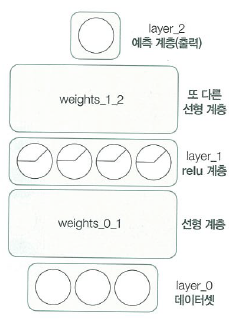

위는 감정을 예측할 때 사용할 예전 신경망을 나타내는 다이어그램이다. 

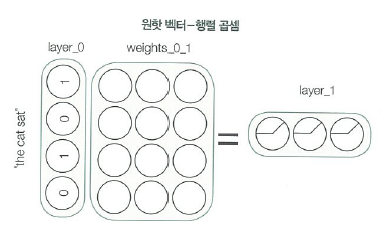

임베딩 계층으로 첫 번째 선형 계층(weights_0_1)을 치환하면 layer_1로 조금 더 쉽게 나아갈 수 있다. 감정 어휘에는 약 70,000개에 이르는 단어가 담겨 있기 때문에, 총합을 구하기 전에 하는 행렬의 각 행과 입력 벡터 안의 0을 곱하는 계산이 벡터-행렬 곱의 대부분이다. 그래서 행렬에서 각 단어에 해당하는 행을 선택해서 합산하는 것이 훨씬 더 효율적이다. 이 말은 결국 첫 번째 선형 계층을 임베딩 계층으로 다룬다는 뜻이다. 이렇게 하면 적은 수의 행을 합산하여 더 빨라질 수 있다.

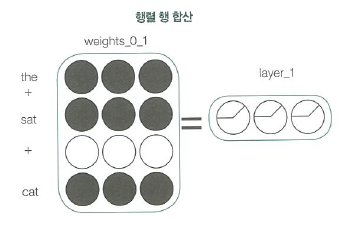

In [9]:
import numpy as np
np.random.seed(1)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

alpha, iterations = (0.01, 2)
hidden_size = 100

weights_0_1 = 0.2*np.random.random((len(vocab),hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,1)) - 0.1

correct,total = (0,0)
for iter in range(iterations):
    
    # train on first 24,000
    for i in range(len(input_dataset)-1000):

        x,y = (input_dataset[i],target_dataset[i])
        layer_1 = sigmoid(np.sum(weights_0_1[x],axis=0)) #embed + sigmoid
        layer_2 = sigmoid(np.dot(layer_1,weights_1_2)) # linear + softmax

        layer_2_delta = layer_2 - y # compare pred with truth
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) #backprop

        weights_0_1[x] -= layer_1_delta * alpha
        weights_1_2 -= np.outer(layer_1,layer_2_delta) * alpha

        if(np.abs(layer_2_delta) < 0.5):
            correct += 1
        total += 1
        if(i % 10 == 9):
            progress = str(i/float(len(input_dataset)))
            sys.stdout.write('\rIter:'+str(iter)\
                             +' Progress:'+progress[2:4]\
                             +'.'+progress[4:6]\
                             +'% Training Accuracy:'\
                             + str(correct/float(total)) + '%')
    print()
correct,total = (0,0)
for i in range(len(input_dataset)-1000,len(input_dataset)):

    x = input_dataset[i]
    y = target_dataset[i]

    layer_1 = sigmoid(np.sum(weights_0_1[x],axis=0))
    layer_2 = sigmoid(np.dot(layer_1,weights_1_2))
    
    if(np.abs(layer_2 - y) < 0.5):
        correct += 1
    total += 1
print("Test Accuracy:" + str(correct / float(total)))

Iter:0 Progress:95.99% Training Accuracy:0.8311666666666667%%
Iter:1 Progress:95.99% Training Accuracy:0.8657708333333334%
Test Accuracy:0.853


## 출력 해석하기

### 신경망은 학습하면서 뭘 배웠을까요?

단어의 존재/부재 여부를 제공하면 두 레이블(긍정/부정) 사이의 직접적인 상관관계를 찾을 것이다.

## 신경 아키텍처

### 아키텍처 선택은 신경망 학습 내용에 어떤 영향을 미쳤을까요?

상관관계를 식별하기 위해 필요한 최소한의 아키텍처는 입력 계층으로부터 출력 계층을 직접 연결하며 단일 가중치 행렬을 가지는 2계층 신경망이다. 그러나 우리는 은닉 계층을 보유하는 신경망을 사용했다. 여기서 은닉 계층의 역할은 무엇일까?

은닉 계층이 하는 일은 이전 계층으로부터 넘겨받은 데이터 요소를 n개의 그룹으로 묶는 것이다. 이후 데이터 요소에 유용한 분류 방법을 모색한다. 어떠한 분류 방법이 유용할까?

* 그룹 분류는 반드시 출력 레이블에 대한 예측에 활용할 수 있어야 한다.

* 그룹 분류는 데이터 안에 발생하고 있는 실제 현상일 때 유용하다.

not terrible과 terrible을 구분할 수 있다면 훌륭하다.

### 단어와 은닉 뉴런을 연결하는 가중치에서 무엇을 관찰해야 할까요?

유사한 레이블과 상관관계가 있는 단어들은 여러 은닉 뉴런에 연결되는 유사한 가중치를 가진다. 왜냐하면 신경망이 이 가중치들을 유사한 은닉 뉴런에 나르도록 학습함으로써 최종 계층(weights_1_2)이 긍정적 또는 부정적 예측을 정확히 할 수 있게 하기 때문이다.

## 단어 임베딩 비교하기

### 가중치 유사도를 어떻게 시각화할 수 있을까요?

어떤 단어가 목표 용어와 가장 유사한지를 알아내기 위해서 각 단어의 벡터를 목표 단어의 벡터와 비교해야 한다. 이때 비교 방법은 '유클리드 거리'이다.

In [43]:
from collections import Counter
import math 

def similar(target):
    target_index = word2index[target]
    scores = Counter()
    for word,index in word2index.items():
        raw_difference = weights_0_1[index] - (weights_0_1[target_index])
        squared_difference = raw_difference * raw_difference
        scores[word] = -math.sqrt(sum(squared_difference))

    return scores.most_common(10)

In [44]:
print(similar('beautiful'))

[('beautiful', -0.0), ('freedom', -0.7328618573608827), ('surprised', -0.7409300198260248), ('both', -0.7464450081616852), ('deserves', -0.7529688705910959), ('episodes', -0.7551002018633921), ('outstanding', -0.7593434470302073), ('atmosphere', -0.7597210902710646), ('subtle', -0.7644099304043086), ('worth', -0.7681128998298311)]


In [45]:
print(similar('terrible'))

[('terrible', -0.0), ('boring', -0.7634260650782582), ('dull', -0.764185237047669), ('fails', -0.765594785834752), ('badly', -0.7883467063108889), ('disappointment', -0.7972982886094487), ('disappointing', -0.8119880515297896), ('lacks', -0.8175055903402595), ('worse', -0.8270337064829019), ('poor', -0.8301230697288274)]


In [46]:
print(similar('nice'))

[('nice', -0.0), ('knowing', -0.7051860965099059), ('brian', -0.7313082581594451), ('paramount', -0.7409777933034138), ('treat', -0.7459781288346), ('necessary', -0.7494629967917517), ('shows', -0.7536577728352308), ('twists', -0.7584788594066303), ('images', -0.7590844416278635), ('pleasure', -0.7640731812472962)]


기대했던 것처럼 각 단어와 가장 유사한 단어는 바로 자기 자신이다.

## 뉴런이 가지는 의미는 뭘까요?

### 예측하는 목표 레이블에 따라 의미가 완전히 달라집니다.

단어의 의미가 단어 분류 방법을 나타내진 않는다는 사실에 주의하자. beautiful과 가장 유사한 단어는 freedom이다. 하지만 의미가 완전히 다르다.

우리가 단어들에 관한 정보를 많이 알고 있어도 신경망이 자기가 다루는 일과 관련이 없으면 학습이 잘 되지 않는다. 따라서 입력과 언어의 뉘앙스를 같이 이해해야 하는 목표 데이터를 함께 신경망에 제공하면, 신경망은 다양한 단어의 뉘앙스가 담긴 해석을 배운다.

흥미로운 가중치를 학습하도록 예측하게 하려면 '공란 채우기'를 하면 된다.

## 공란 채우기

### 풍부한 신호를 통해 단어의 풍부한 의미를 학습시키세요.

이 예제는 예전 신경망과 몇 가지 수정을 거친 거의 동일한 신경망을 사용한다. 첫 번째로, 리뷰에 대한 단일 레이블을 예측하는 대신 각 구절을 취해서 한 단어를 제거한다. 그리고 남은 단어들을 이용해서 빠진 단어가 무엇인지 알아내도록 신경망을 학습시킬 것이다. 두 번째로, '네거티브 샘플링'이라는 트릭을 이용해서 신경망이 학습하는 속도를 높일 것이다.

어떤 단어가 빠졌는지 예측하려면 가능한 각 단어마다 레이블이 필요하다고 생각해보자. 이러면 레이블은 수천 개가 필요할 것이고 그만큼 학습 속도도 느려질 것이다. 이를 해결하기 위해 각 순전파 단계에 대해 무작위로 레이블을 무시해보겠다.

In [48]:
import sys,random,math
from collections import Counter
import numpy as np

np.random.seed(1)
random.seed(1)
f = open(r'D:\workplace\study\reviews.txt')
raw_reviews = f.readlines()
f.close()

tokens = list(map(lambda x:(x.split(" ")),raw_reviews))
wordcnt = Counter()
for sent in tokens:
    for word in sent:
        wordcnt[word] -= 1
vocab = list(set(map(lambda x:x[0],wordcnt.most_common())))

word2index = {}
for i,word in enumerate(vocab):
    word2index[word]=i

concatenated = list()
input_dataset = list()
for sent in tokens:
    sent_indices = list()
    for word in sent:
        try:
            sent_indices.append(word2index[word])
            concatenated.append(word2index[word])
        except:
            ""
    input_dataset.append(sent_indices)
concatenated = np.array(concatenated)
random.shuffle(input_dataset)

alpha, iterations = (0.05, 2)
hidden_size,window,negative = (50,2,5)

weights_0_1 = (np.random.rand(len(vocab),hidden_size) - 0.5) * 0.2
weights_1_2 = np.random.rand(len(vocab),hidden_size)*0

layer_2_target = np.zeros(negative+1)
layer_2_target[0] = 1

def similar(target='beautiful'):
  target_index = word2index[target]

  scores = Counter()
  for word,index in word2index.items():
    raw_difference = weights_0_1[index] - (weights_0_1[target_index])
    squared_difference = raw_difference * raw_difference
    scores[word] = -math.sqrt(sum(squared_difference))
  return scores.most_common(10)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

for rev_i,review in enumerate(input_dataset * iterations):
  for target_i in range(len(review)):
        
    # since it's really expensive to predict every vocabulary
    # we're only going to predict a random subset
    target_samples = [review[target_i]]+list(concatenated\
    [(np.random.rand(negative)*len(concatenated)).astype('int').tolist()])

    left_context = review[max(0,target_i-window):target_i]
    right_context = review[target_i+1:min(len(review),target_i+window)]

    layer_1 = np.mean(weights_0_1[left_context+right_context],axis=0)
    layer_2 = sigmoid(layer_1.dot(weights_1_2[target_samples].T))
    layer_2_delta = layer_2 - layer_2_target
    layer_1_delta = layer_2_delta.dot(weights_1_2[target_samples])

    weights_0_1[left_context+right_context] -= layer_1_delta * alpha
    weights_1_2[target_samples] -= np.outer(layer_2_delta,layer_1)*alpha

  if(rev_i % 250 == 0):
    sys.stdout.write('\rProgress:'+str(rev_i/float(len(input_dataset)
        *iterations)) + "   " + str(similar('terrible')))
  sys.stdout.write('\rProgress:'+str(rev_i/float(len(input_dataset)
        *iterations)))
print(similar('terrible'))

Progress:0.99998 [('terrible', -0.0), ('horrible', -3.0536799112501383), ('brilliant', -3.188557621898011), ('superb', -3.6055067812895243), ('phenomenal', -3.7497523937095183), ('pathetic', -3.807346259830313), ('marvelous', -3.827009683696805), ('masterful', -3.83346276160222), ('mediocre', -4.049959898116504), ('miserable', -4.05958094299796)]89795)]]])]4)]][('terrible', -0.0), ('horrible', -2.9696135827854624), ('brilliant', -3.365202376835501), ('pathetic', -3.75799998032076), ('phenomenal', -3.818124777554139), ('superb', -3.8683208236595363), ('marvelous', -3.878803266456985), ('masterful', -3.8812902050522577), ('bad', -4.001473590481834), ('mediocre', -4.043521482638952)]


In [49]:
print(similar('beautiful'))

[('beautiful', -0.0), ('lovely', -2.8937967270180978), ('cute', -3.337428087364102), ('fantastic', -3.3824441808622048), ('glamorous', -3.3849223366344035), ('creepy', -3.3966973917865944), ('nightmarish', -3.4838785389005587), ('spooky', -3.486801465091117), ('classy', -3.579723638234184), ('fiery', -3.5906856621325214)]


### 의미는 손실에서 유래합니다.

신경망이 동일한 데이터셋을 학습하더라도 입력과 목푯값을 바탕으로 학습 목표를 바꿀 수 있다. 이러한 절차를 '지능표적화'라고 부른다.

입력-목푯값 조절만이 지능표적화를 수행하는 유일한 방법은 아니다. 오차를 측정하는 방법, 신경망이 가지는 계층의 크기와 유형, 적용할 정규화 유형을 조정하면서도 지능표적화를 수행할 수 있다. 딥러닝 연구에서 이 모든 기법은 '손실 함수' 구축 기법에 해당한다.

### 신경망이 실제로 데이터를 학습하는 것은 아닙니다. 손실 함수를 최소화할 뿐이죠.

4장에서 학습은 신경망 내의 각 가중치를 조정해서 오차 함수를 0으로 감소시키는 과정이라고 설명했다. 이번 절에서는 동일한 현상을 다른 관점에서 설명하고자 한다. 오차를 선택함으로써 신경망으로 하여금 우리가 관심있는 패턴을 학습하게 할 것이다.

#### 학습의 왕도
정확한 방법과 정확한 크기로 각 가중치를 조정해서 오차를 0으로 감소시킨다.

#### 비결
모든 input(입력)과 goal_pred(예측 목표)에 대해, prediction(예측 결과)과 error(오차) 공식을 결합함으로써 error(오차)와 weight(가중치) 사이의 정확한 관계가 정의됩니다.

error = ((0.5 * weight) - 0.8) ** 2

이전에도 이 공식을 봤을 것이다. 우리는 순전파(0.5 * weight)를 한 다음 목표(0.8)와 비교하여 오차를 평가했다. 이제 두 단계를 별개로 생각하지 말고, 전체 공식을 오차 값 평가 단계로 생각하자. 왜 서로 다른 단어 임베딩 군집화가 이루어지는지 그 이유가 드러날 것이다. 신경망과 데이터셋은 유사했지만 오차 함수가 근본적으로 달랐으며, 각 오차 함수는 각 신경망 안에서 서로 다른 단어 군집화를 유도했다.

### 손실 함수 선택이 신경망의 지식을  결정합니다.

손실 함수는 오차 함수를 좀 더 공식적으로 표현한 용어이다. 또는 목적 함수라고도 한다.

두 신경망이 동일한 가중치, 데이터셋을 갖고 학습하였지만, 궁극적으로는 다른 손실 함수를 선택함으로써 매우 다른 패턴을 학습했다.

## King - Man + Woman ~= Queen

### 단어 유추는 예전 신경망의 흥미로운 결과물입니다.

신경망 단어 임베딩의 가장 유명한 속성은 무엇일까? 공란 채우기는 '단어 유추'라고 알려진 현상과 더불어 단어 임베딩을 형성한다. 이 단어 임베딩에 다른 단어에 대한 벡터를 취해서 기본적인 대수 연산을 할 수 있다. 예를 들어 충분히 큰 말뭉치로 예전 신경망을 학습한다면 king에 대한 벡터를 취해 그 벡터에서 man에 대한 벡터를 차감하고, 다시 woman에 대한 벡터를 더한 후 가장 유사한 벡터를 찾으면 queen이 나올 것이다.

In [12]:
from collections import Counter
import math 

def analogy(positive=['terrible','good'],negative=['bad']):
    
    norms = np.sum(weights_0_1 * weights_0_1,axis=1)
    norms.resize(norms.shape[0],1)
    
    normed_weights = weights_0_1 * norms
    
    query_vect = np.zeros(len(weights_0_1[0]))
    for word in positive:
        query_vect += normed_weights[word2index[word]]
    for word in negative:
        query_vect -= normed_weights[word2index[word]]
    
    scores = Counter()
    for word,index in word2index.items():
        raw_difference = weights_0_1[index] - query_vect
        squared_difference = raw_difference * raw_difference
        scores[word] = -math.sqrt(sum(squared_difference))
        
    return scores.most_common(10)[1:]

In [13]:
analogy(['terrible','good'],['bad'])

[('waste', -2.3027304637721344),
 ('awful', -2.3830336844127533),
 ('poorly', -2.4039992874074865),
 ('worst', -2.412336605088503),
 ('disappointment', -2.4207069920589905),
 ('dull', -2.5055480978345637),
 ('disappointing', -2.508688585432356),
 ('worse', -2.529734852793661),
 ('boring', -2.554546871101485)]

In [14]:
analogy(['elizabeth','he'],['she'])

[('he', -0.5026231252814634),
 ('jeremey', -0.5193490043428239),
 ('supposively', -0.5338105477888393),
 ('pearls', -0.5359055789435179),
 ('flail', -0.5461169410247466),
 ('highwayman', -0.5462483467049587),
 ('fercryinoutloud', -0.5487808900674953),
 ('anarchistic', -0.5528132628027717),
 ('supplant', -0.5529181370428833)]

## 단어 유추

### 데이터 안에 존재하는 속성의 선형 압축

단어 유추가 처음 발견됐을 때, 사람들은 온갖 응용을 하려 애썼지만 단어 유추는 그 이후로 별다른 발전이 없었다. 이제는 언어 관련 작업이 대부분 순환 아키텍처에 초점을 두고 있다. 그렇기에 선택한 손실 함수의 결과인 단어 임베딩 안에서 어떤 일이 벌어지는지 살펴보는건 굉장이 중요하다. 새로운 손실 함수가 단어 유추를 유발하면 어떤 일이 생길까?

In [ ]:
king = [0.6, 0.1]
man = [0.5, 0.0]
woman = [0.0, 0.8]
queen = [0.1, 1.0]
king - man = [0.1, 0.1]
queen - woman = [0.1, 0.2]

king/ man, queen/ woman의 최종 예측은 비슷하다. 왜냐하면 king과 man 사이의 차이는 royalty 벡터를 남기기 때문이다. male과 female 관련 단어가 있는 한편, royalty 방향으로 분류되는 또 다른 그룹도 존재한다. queen이라는 단어가 나오면 woman 관련 단어와 왕족 관련 단어가 나올 확률을 높인다. 우리는 king에 대한 벡터에 male을 차감하고 female을 더하면 queen에 가까운 무언가를 얻는다.